In [196]:
import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats

In [197]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'cits_match.csv'),
                  sep=",", low_memory=False)
data[['distname', 'year', 'doi_year', 'treat', 'doi_year_centered']][data.doi == False].head()

,distname,year,doi_year,treat,doi_year_centered
49,ANDREWS ISD,2012,NaN,0,-4.0
50,ANDREWS ISD,2013,NaN,0,-3.0
51,ANDREWS ISD,2014,NaN,0,-2.0
52,ANDREWS ISD,2015,NaN,0,-1.0
53,ANDREWS ISD,2016,NaN,0,0.0


In [188]:
data[data.doi == False][['distname','doi', 'doi_year', 'year', 'treat']].head()

,distname,doi,doi_year,year,treat
49,ANDREWS ISD,False,NaN,2012,0
50,ANDREWS ISD,False,NaN,2013,0
51,ANDREWS ISD,False,NaN,2014,0
52,ANDREWS ISD,False,NaN,2015,0
53,ANDREWS ISD,False,NaN,2016,0


In [189]:
data[data.year == 2014].doi_year.value_counts().sort_index()

2016.0     52
2017.0    560
2018.0     93
2019.0      1
Name: doi_year, dtype: int64

# Explore dates

# Graph by year of implementation

In [190]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['avescores'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['avescores'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['avescores'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['avescores'].mean()).reset_index()
df_treat2018

,year,avescores
0,2012,-0.028827
1,2013,0.042532
2,2014,0.159913
3,2015,0.191562
4,2016,0.376683
5,2017,0.355002
6,2018,0.541331


# Full Set of Years and Groups

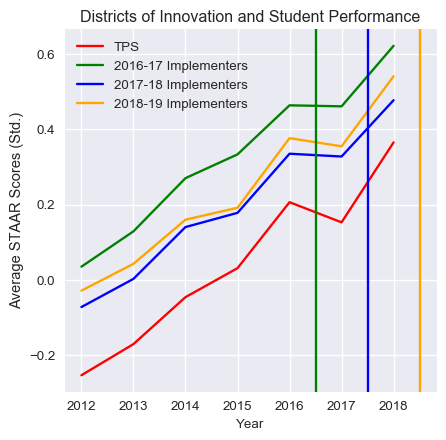

In [191]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.avescores, color = 'red', label = 'TPS')
plt.plot(df_treat2016.year, df_treat2016.avescores, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017.year, df_treat2017.avescores, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018.year, df_treat2018.avescores, color = 'orange', label = '2018-19 Implementers')

plt.axvline(x = 2016.5, color = 'green')
plt.axvline(x = 2017.5, color = 'blue')
plt.axvline(x = 2018.5, color = 'orange')

plt.legend()


plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')


plt.show()

# Evidence of Parallel Trends

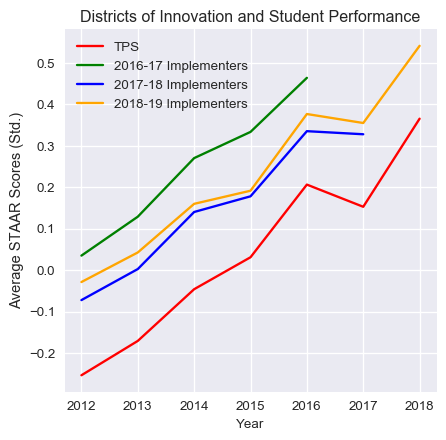

In [205]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.avescores, color = 'red', label = 'TPS')
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].avescores, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].avescores, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].avescores, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

# DOI vs TPS

In [214]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['avescores'].mean()).reset_index()
df_treat = pd.DataFrame(data[data.doi == True].groupby(['year'])['avescores'].mean()).reset_index()
df_treat

,year,avescores
0,2012,-0.057750
1,2013,0.018244
2,2014,0.153262
3,2015,0.192345
4,2016,0.351232
5,2017,0.342197
6,2018,0.497711


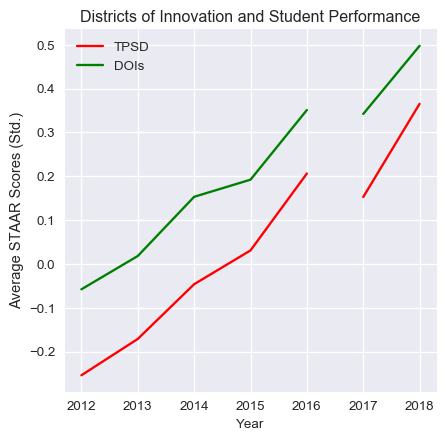

In [217]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control[df_control.year < 2017].year, df_control[df_control.year < 2017].avescores, color = 'red', label = 'TPSD')
plt.plot(df_treat[df_treat.year < 2017].year, df_treat[df_treat.year < 2017].avescores, color = 'green', label = 'DOIs')
plt.legend()

plt.plot(df_control[df_control.year >= 2017].year, df_control[df_control.year >= 2017].avescores, color = 'red')
plt.plot(df_treat[df_treat.year >= 2017].year, df_treat[df_treat.year >= 2017].avescores, color = 'green')





plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')


plt.show()

# Weighted Average

In [219]:
data['score_weighted'] = data.avescores * data.psweight
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['score_weighted'].sum()).reset_index()
df_control

,year,score_weighted
0,2012,-45.946266
1,2013,16.841176
2,2014,91.843368
3,2015,155.729830
4,2016,244.189319
5,2017,189.847414
6,2018,333.750287


In [ ]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['avescores'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['avescores'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['avescores'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['avescores'].mean()).reset_index()
df_treat2018

In [200]:
len(data.psw)


6314

In [203]:
sum(data[data.doi == False].pswtshare)

3.5714285714285716